# Elastic Network Models (ENM)

In [1]:
from prody import *
import numpy as np
from os.path import basename
import fnmatch
import os
import networkx as nx
from networkx.algorithms import community
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm

### Parse pdb file and select C<sub>$\beta$</sub> (C<sub>$\alpha$</sub> for Gly)

In [2]:
#fetchPDB("1dv9", compressed =False)
pdb_name = "1dv9.pdb"

In [3]:
structure_alpha = parsePDB(pdb_name).select("protein and calpha")
structure_beta = parsePDB(pdb_name).select("(name CB and protein) or (name CA and resname GLY)")
print("Number of residues in this protein:  "+str(len(structure_alpha)))
file_name_wh_ex = str(os.path.splitext(pdb_name)[0])

@> 2590 atoms and 21 coordinate set(s) were parsed in 0.16s.
@> 2590 atoms and 21 coordinate set(s) were parsed in 0.16s.


Number of residues in this protein:  162


### Now we will do GNM and construct Kirchhoff ( <strong>$\Gamma$</strong>)

### We can change the cutoff and spring constant (gamma) of $\Gamma$ 

In [4]:
gnm = GNM("")
gnm.buildKirchhoff(structure_beta, cutoff=10, gamma=1.0)
gnm.calcModes(10)

@> Kirchhoff was built in 0.01s.
@> 10 modes were calculated in 0.02s.


### Visualize $\Gamma$ as a heatmap.

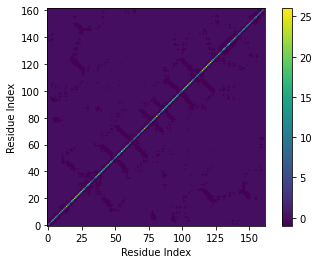

In [5]:
plt.imshow(gnm.getKirchhoff(), origin='lower')
plt.ylabel('Residue Index'); #set label names
plt.xlabel('Residue Index');
cbar = plt.colorbar()
plt.show()
plt.close()

### Visualize $\Gamma$<sup>-1</sup> as a heatmap.

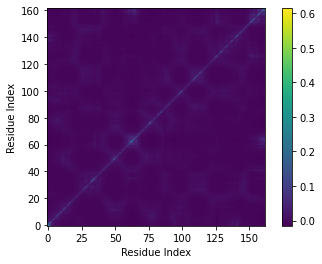

In [6]:
plt.imshow(np.linalg.pinv(gnm.getKirchhoff()), origin='lower')
plt.ylabel('Residue Index'); #set label names
plt.xlabel('Residue Index');
cbar = plt.colorbar()
plt.show()
plt.close()

### Let's calculate Eigenvalues 1/$\lambda$ and Eigenvectors 

### First Mode (Slowest Mode)

In [7]:
print(gnm.getEigvals()[0].round(3))

1.152


In [8]:
print(gnm.getEigvecs()[0].round(3))

[-0.301  0.812  0.104 -0.224  0.076 -0.261 -0.051 -0.061 -0.147  0.097]


[([<matplotlib.lines.Line2D at 0x16f22ffabc8>], [], [], [])]

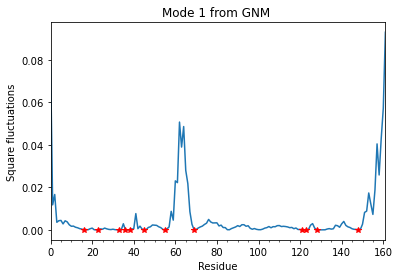

In [9]:
showSqFlucts(gnm[0], hinges=True)

### Second Mode

In [10]:
print(gnm.getEigvals()[1].round(3))

1.438


In [11]:
print(gnm.getEigvecs()[1].round(3))

[-0.116  0.207  0.025  0.021 -0.049  0.149  0.017  0.018  0.266 -0.096]


[([<matplotlib.lines.Line2D at 0x16f230b26c8>], [], [], [])]

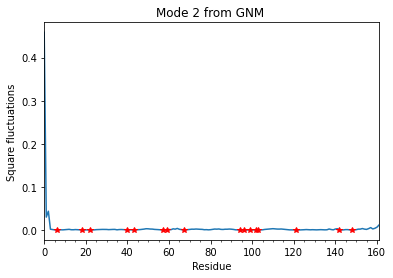

In [12]:
showSqFlucts(gnm[1], hinges=True)

### What about directionality? It comes with ANM

In [13]:
anm = ANM('')
anm.buildHessian(structure_alpha, cutoff=10.0, gamma = 1.0)
anm.calcModes(10)

@> Hessian was built in 0.04s.
@> 10 modes were calculated in 0.02s.


### First Mode (Slowest Mode)

In [14]:
print(anm.getEigvals()[0].round(3))

0.007


In [15]:
print(anm.getEigvecs()[0].round(3))

[ 0.028  0.399 -0.006  0.842  0.046  0.014 -0.039 -0.008 -0.011 -0.007]


In [16]:
writeNMD(file_name_wh_ex+'_anm_modes.nmd', anm, structure_alpha)

'1dv9_anm_modes.nmd'